In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import gc 


plt.style.use('ggplot')
mpl.rcParams['figure.dpi'] = 150

mlops 
bigdata 
cv 

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
#downcast for less memory usage 
cols_int16={
    'id': 'int16',
    'item_id': 'int16',
    'dept_id': 'int8',
    'cat_id': 'int8',
    'store_id': 'int8',
    'state_id': 'int8',
    'sales': 'int16',
    'wm_yr_wk': 'int16',
    'month': 'int8',
    'year': 'int16',
    'd': 'int16',
    'event_name_1': 'int8',
    'event_type_1': 'int8',
    'event_name_2': 'int8',
    'event_type_2': 'int8',
    'snap_CA': 'int8',
    'snap_TX': 'int8',
    'snap_WI': 'int8',
    'day': 'int8',
    'sell_price':'float32'
    }

df=pd.read_csv('final.csv',dtype=cols_int16)

#### info 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58327370 entries, 0 to 58327369
Data columns (total 22 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int16  
 1   item_id       int16  
 2   dept_id       int8   
 3   cat_id        int8   
 4   store_id      int8   
 5   state_id      int8   
 6   wm_yr_wk      int16  
 7   day           int8   
 8   month         int8   
 9   year          int16  
 10  d             int16  
 11  event_name_1  int8   
 12  event_type_1  int8   
 13  event_name_2  int8   
 14  event_type_2  int8   
 15  snap_CA       int8   
 16  snap_TX       int8   
 17  snap_WI       int8   
 18  weekday_cos   float64
 19  weekday_sin   float64
 20  sales         int16  
 21  sell_price    float32
dtypes: float32(1), float64(2), int16(6), int8(13)
memory usage: 2.4 GB


In [4]:
df.tail()

,id,item_id,dept_id,cat_id,store_id,state_id,wm_yr_wk,day,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,weekday_cos,weekday_sin,sales,sell_price
58327365,14329,1432,2,0,9,2,11613,24,4,2016,1913,19,2,3,1,0,0,0,0.62349,-0.781831,1,2.98
58327366,14339,1433,2,0,9,2,11613,24,4,2016,1913,19,2,3,1,0,0,0,0.62349,-0.781831,0,2.48
58327367,14349,1434,2,0,9,2,11613,24,4,2016,1913,19,2,3,1,0,0,0,0.62349,-0.781831,0,3.98
58327368,14359,1435,2,0,9,2,11613,24,4,2016,1913,19,2,3,1,0,0,0,0.62349,-0.781831,3,1.28
58327369,14369,1436,2,0,9,2,11613,24,4,2016,1913,19,2,3,1,0,0,0,0.62349,-0.781831,0,1.00


In [ ]:
tmp=df.groupby('item_id')['sales'].sum()
plt.bar(tmp.index,tmp.values)

10

In [11]:
df.describe()

,id,item_id,dept_id,cat_id,store_id,state_id,wm_yr_wk,day,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,weekday_cos,weekday_sin,sales,sell_price
count,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07
mean,1.524450e+04,1.524000e+03,3.161036e+00,8.720892e-01,4.500000e+00,9.000000e-01,1.133919e+04,1.570308e+01,6.357554e+00,2.013209e+03,9.570000e+02,1.869995e+01,1.980659e+00,2.997386e+00,9.989545e-01,3.293257e-01,3.293257e-01,3.293257e-01,2.096021e-04,-9.183269e-04,1.126322e+00,4.446165e+00
std,8.801705e+03,8.801704e+02,1.915904e+00,8.934944e-01,2.872281e+00,8.306624e-01,1.503742e+02,8.793482e+00,3.458773e+00,1.532086e+00,5.522355e+02,2.766177e+00,4.001335e-01,8.851133e-02,4.571503e-02,4.699684e-01,4.699684e-01,4.699684e-01,7.068991e-01,7.073138e-01,3.873108e+00,3.525359e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.110100e+04,1.000000e+00,1.000000e+00,2.011000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.009689e-01,-9.749279e-01,0.000000e+00,1.000000e-02
25%,7.622000e+03,7.620000e+02,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.121700e+04,8.000000e+00,3.000000e+00,2.012000e+03,4.790000e+02,1.900000e+01,2.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.009689e-01,-7.818315e-01,0.000000e+00,2.180000e+00
50%,1.524450e+04,1.524000e+03,3.000000e+00,1.000000e+00,4.500000e+00,1.000000e+00,1.133300e+04,1.600000e+01,6.000000e+00,2.013000e+03,9.570000e+02,1.900000e+01,2.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.225209e-01,0.000000e+00,0.000000e+00,3.420000e+00
75%,2.286700e+04,2.286000e+03,5.000000e+00,2.000000e+00,7.000000e+00,2.000000e+00,1.144800e+04,2.300000e+01,9.000000e+00,2.015000e+03,1.435000e+03,1.900000e+01,2.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.234898e-01,7.818315e-01,1.000000e+00,5.840000e+00
max,3.048900e+04,3.048000e+03,6.000000e+00,2.000000e+00,9.000000e+00,2.000000e+00,1.161300e+04,3.100000e+01,1.200000e+01,2.016000e+03,1.913000e+03,3.000000e+01,4.000000e+00,4.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.749279e-01,7.630000e+02,1.073200e+02


#### The impact of the sell price on the sales

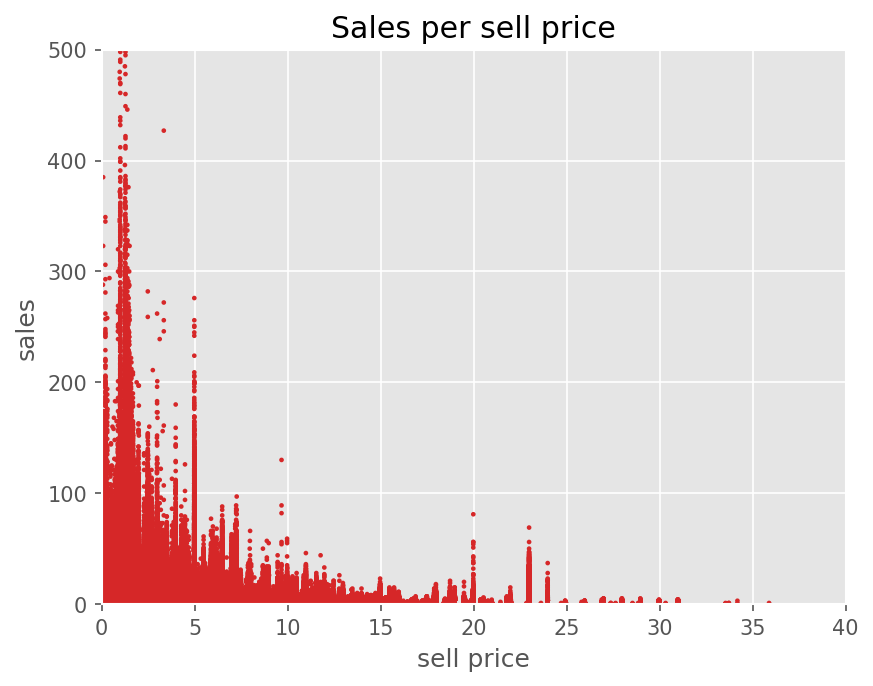

In [ ]:
plt.scatter(df['sell_price'],df['sales'],
            s=5,          
            linewidth=0,
            color='tab:red',
            edgecolors='none')
plt.xlim(0,40)
plt.ylim(0,500)
plt.title('Sales per sell price')
plt.xlabel('sell price')
plt.ylabel('sales')
plt.show()

In [39]:
gc.collect()

3127

#### The effect of SNAP puchases on sales

##### the effect of SNAPS per state 

In [4]:
import pickle as pkl 

with open('validation_le_encoders.pkl','rb')as f: 
    le=pkl.load(f)

for i,j in enumerate(le['state_id'].classes_) : 
    print(f' value {j} encoded as {i}')

 value CA encoded as 0
 value TX encoded as 1
 value WI encoded as 2


In [5]:
df['snap_CA']=((df['state_id']==0) & (df['snap_CA'])).astype('int8')
df['snap_TX']=((df['state_id']==1) & (df['snap_TX'])).astype('int8')
df['snap_WI']=((df['state_id']==2) & (df['snap_WI'])).astype('int8')

In [6]:
ca=df[df['state_id']==0].groupby('snap_CA')['sales'].mean()
tx=df[df['state_id']==1].groupby('snap_TX')['sales'].mean()
wi=df[df['state_id']==2].groupby('snap_WI')['sales'].mean()

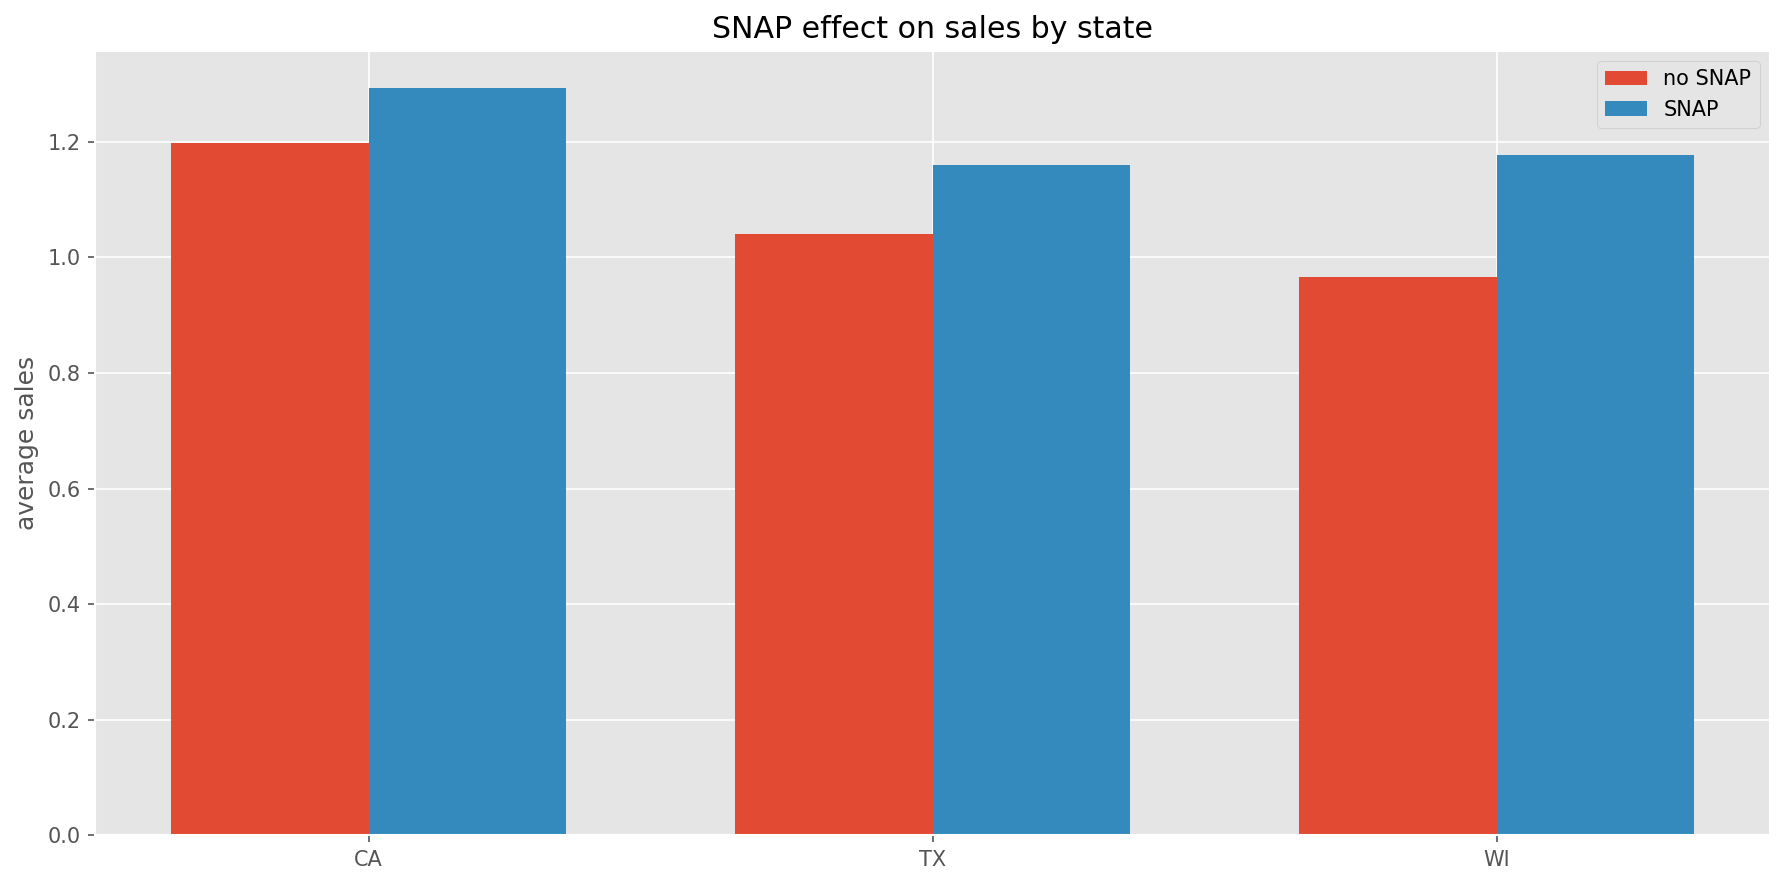

In [7]:
w=0.35
plt.figure(figsize=(12,6))
plt.bar([0-w,2-w,4-w],[ca.values[0],tx.values[0],wi.values[0]],label='no SNAP',width=0.7)
plt.bar([0+w,2+w,4+w],[ca.values[1],tx.values[1],wi.values[1]],label='SNAP',width=0.7)

plt.xticks([0,2,4],['CA','TX','WI'])
plt.ylabel('average sales')
plt.title('SNAP effect on sales by state')
plt.tight_layout()
plt.legend()
plt.show()

##### the effect of SNAPS per item category 

In [9]:
# to study the effect on snap on each item category we need to create a temp column that tells us if 
# that item had snap or not on the day of the purchase , no matter in what state it was 

df['tmp']=((df['snap_CA']) | (df['snap_TX']) | (df['snap_WI'])).astype('int8')

In [10]:
cat_0=df[df['cat_id']==0].groupby('tmp')['sales'].mean()
cat_1=df[df['cat_id']==1].groupby('tmp')['sales'].mean()
cat_2=df[df['cat_id']==2].groupby('tmp')['sales'].mean()

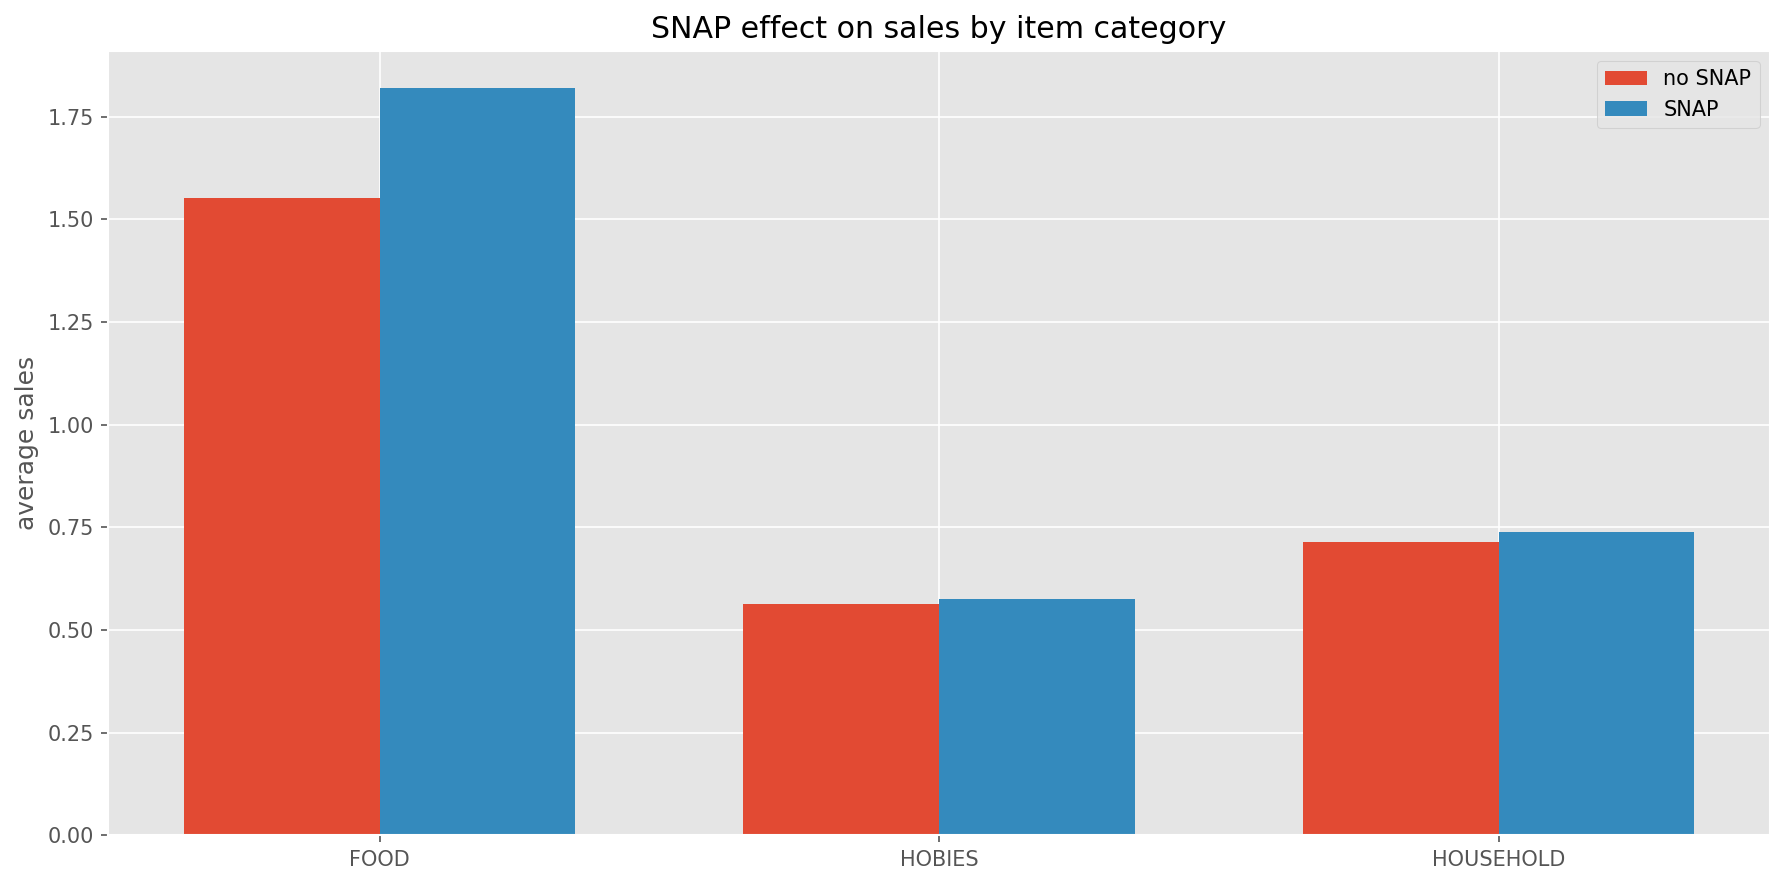

In [14]:
w=0.35
plt.figure(figsize=(12,6))
plt.bar([0-w,2-w,4-w],[cat_0.values[0],cat_1.values[0],cat_2.values[0]],label='no SNAP',width=0.7)
plt.bar([0+w,2+w,4+w],[cat_0.values[1],cat_1.values[1],cat_2.values[1]],label='SNAP',width=0.7)

plt.xticks([0,2,4],['FOOD','HOBIES','HOUSEHOLD'])
plt.ylabel('average sales')
plt.title('SNAP effect on sales by item category')
plt.tight_layout()
plt.legend()
plt.show()

the snap has more effect on the food related items , and it makes sense since SNAP provides food benefits to low-income families to supplement their grocery budget so they can afford the nutritious food essential to health and well-being.

In [11]:
df.drop('tmp',axis=1)
del ca,wi,tx ,cat_0,cat_1,cat_2
gc.collect()

4557

#### Total sales per weekday 

In [12]:
df_temp=pd.read_csv('../calendar.csv')

In [13]:
df_temp['d']=df_temp['d'].str[2:].astype('int16')
df_temp.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,5,NaN,NaN,NaN,NaN,1,0,1


In [14]:
#merge back the weekday column so i can use it for the plotting 

df=pd.merge(df,
            df_temp[['weekday','d']],
            on='d',
            how='inner'
        )
df.head()
del df_temp
gc.collect()

0

/tmp/ipykernel_1062539/1222465469.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_temp=df.groupby('weekday')['sales'].sum().sort_index()


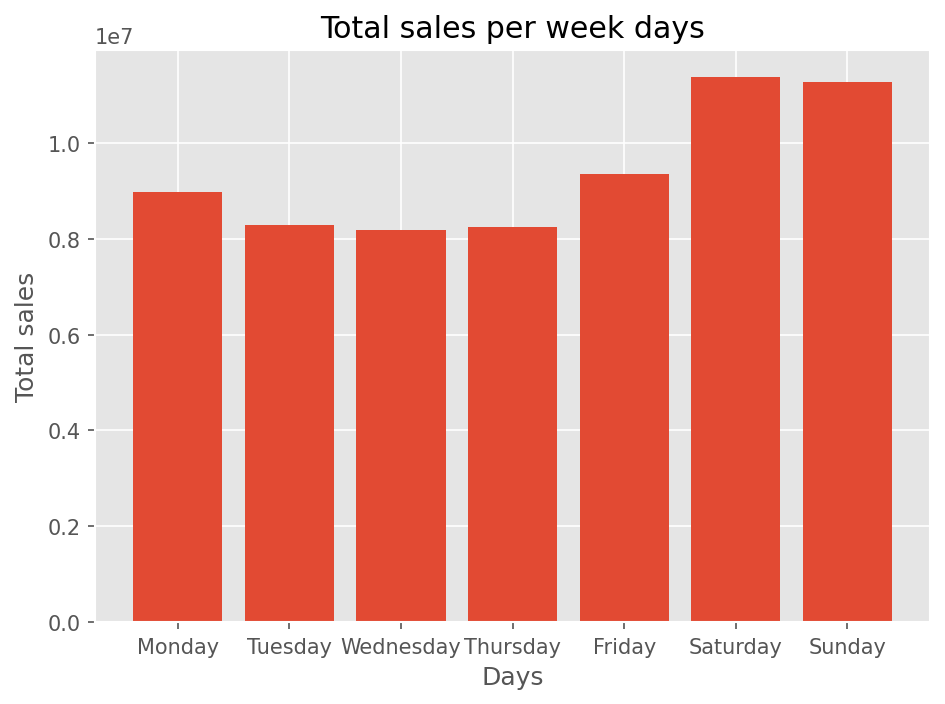

In [15]:
days=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday']=pd.Categorical(df['weekday'],days,ordered=True)
df_temp=df.groupby('weekday')['sales'].sum().sort_index()

plt.Figure(figsize=(12,6))
plt.bar(df_temp.index,df_temp.values)
plt.xlabel('Days')
plt.ylabel('Total sales')
plt.title('Total sales per week days')
plt.tight_layout()  
plt.show()

#### Sales of each categorie over time 

In [5]:
import pickle as pkl 

with open('validation_le_encoders.pkl','rb')as f: 
    le=pkl.load(f)

for i,j in enumerate(le['store_id'].classes_) : 
    print(f' value {j} encoded as {i}')

 value CA_1 encoded as 0
 value CA_2 encoded as 1
 value CA_3 encoded as 2
 value CA_4 encoded as 3
 value TX_1 encoded as 4
 value TX_2 encoded as 5
 value TX_3 encoded as 6
 value WI_1 encoded as 7
 value WI_2 encoded as 8
 value WI_3 encoded as 9


In [7]:
print(le['store_id'].classes_)

['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']


In [18]:
print(le['cat_id'].classes_)

['FOODS' 'HOBBIES' 'HOUSEHOLD']


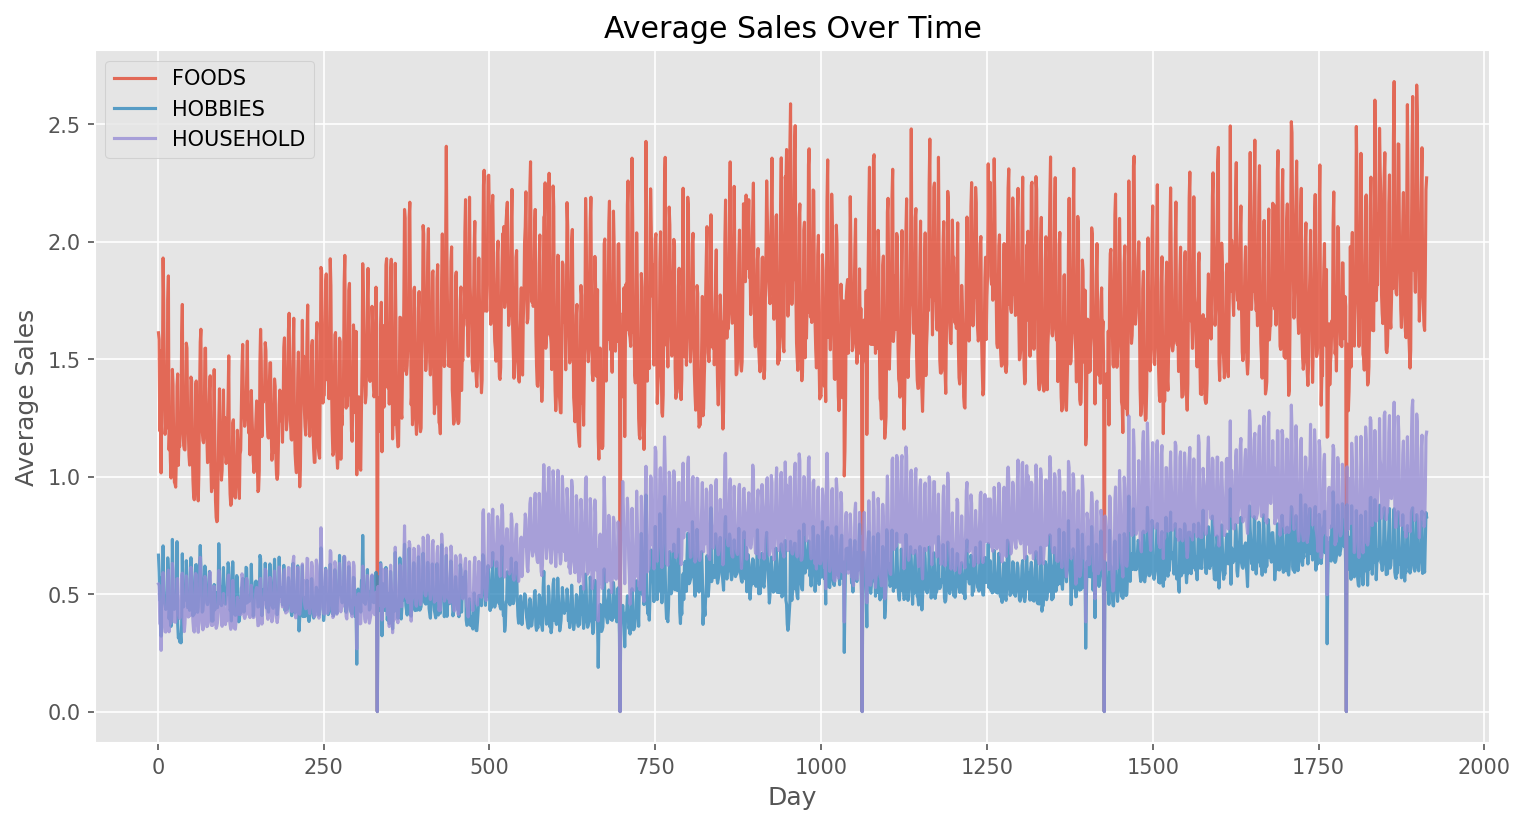

4035

In [9]:
daily_sales_1 = df[df['cat_id']==0].groupby('d')['sales'].mean()
daily_sales_2 = df[df['cat_id']==1].groupby('d')['sales'].mean()
daily_sales_3 = df[df['cat_id']==2].groupby('d')['sales'].mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales_1.index, daily_sales_1.values,label=le['cat_id'].classes_[0],alpha=0.8)
plt.plot(daily_sales_2.index, daily_sales_2.values,label=le['cat_id'].classes_[1],alpha=0.8)
plt.plot(daily_sales_3.index, daily_sales_3.values,label=le['cat_id'].classes_[2],alpha=0.8)
plt.legend()
plt.xlabel('Day')
plt.ylabel('Average Sales')
plt.title('Average Sales Over Time')
plt.show()

del daily_sales_1,daily_sales_2,daily_sales_3
gc.collect()

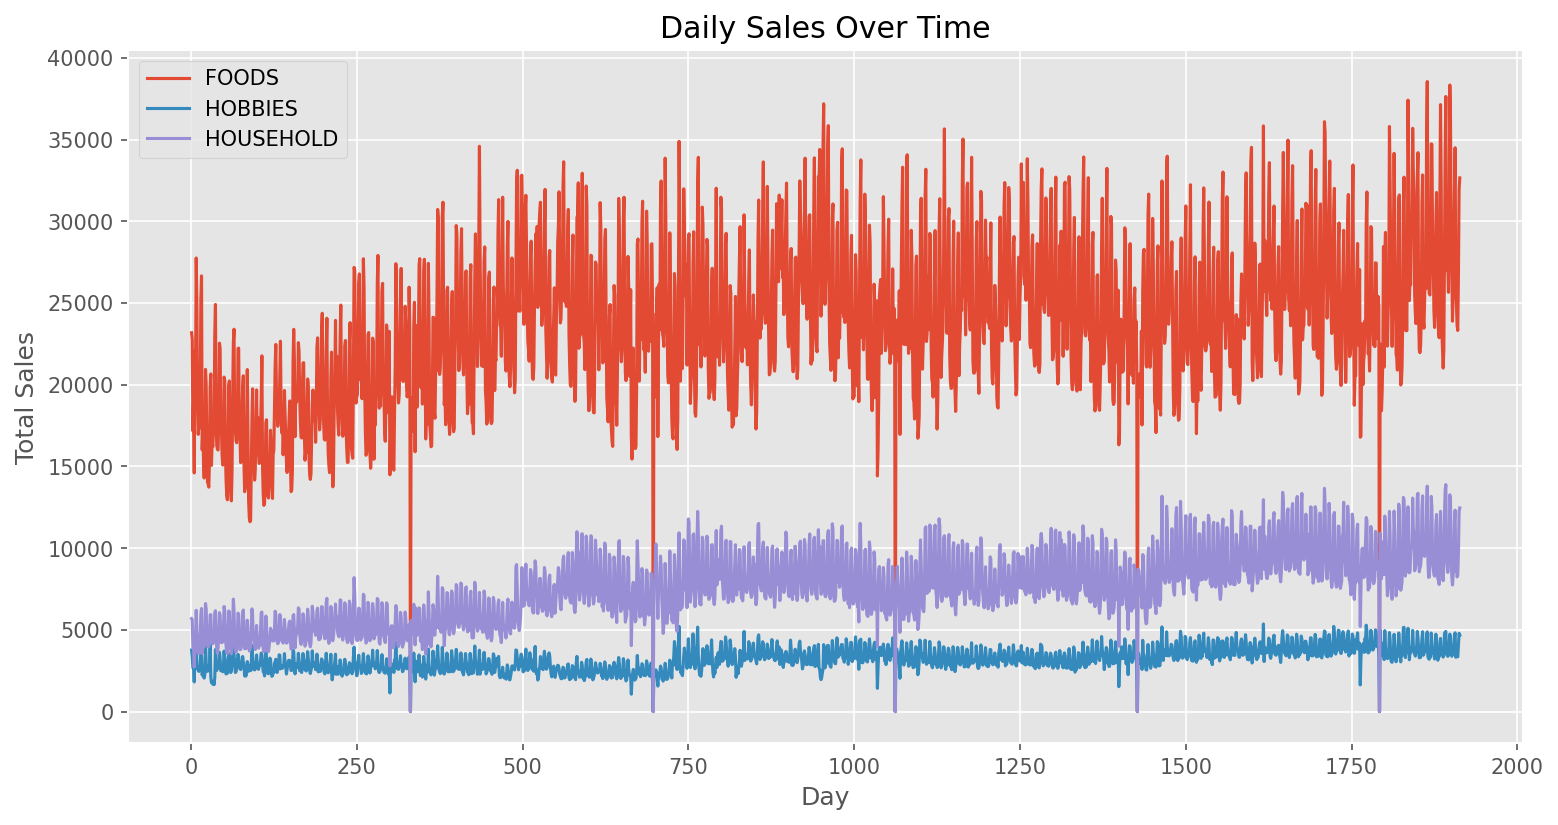

4317

In [6]:
daily_sales_1 = df[df['cat_id']==0].groupby('d')['sales'].sum()
daily_sales_2 = df[df['cat_id']==1].groupby('d')['sales'].sum()
daily_sales_3 = df[df['cat_id']==2].groupby('d')['sales'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales_1.index, daily_sales_1.values,label=le['cat_id'].classes_[0])
plt.plot(daily_sales_2.index, daily_sales_2.values,label=le['cat_id'].classes_[1])
plt.plot(daily_sales_3.index, daily_sales_3.values,label=le['cat_id'].classes_[2])
plt.legend()
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.title('Daily Sales Over Time')
plt.show()

del daily_sales_1,daily_sales_2,daily_sales_3
gc.collect()

##### daily sales per store 

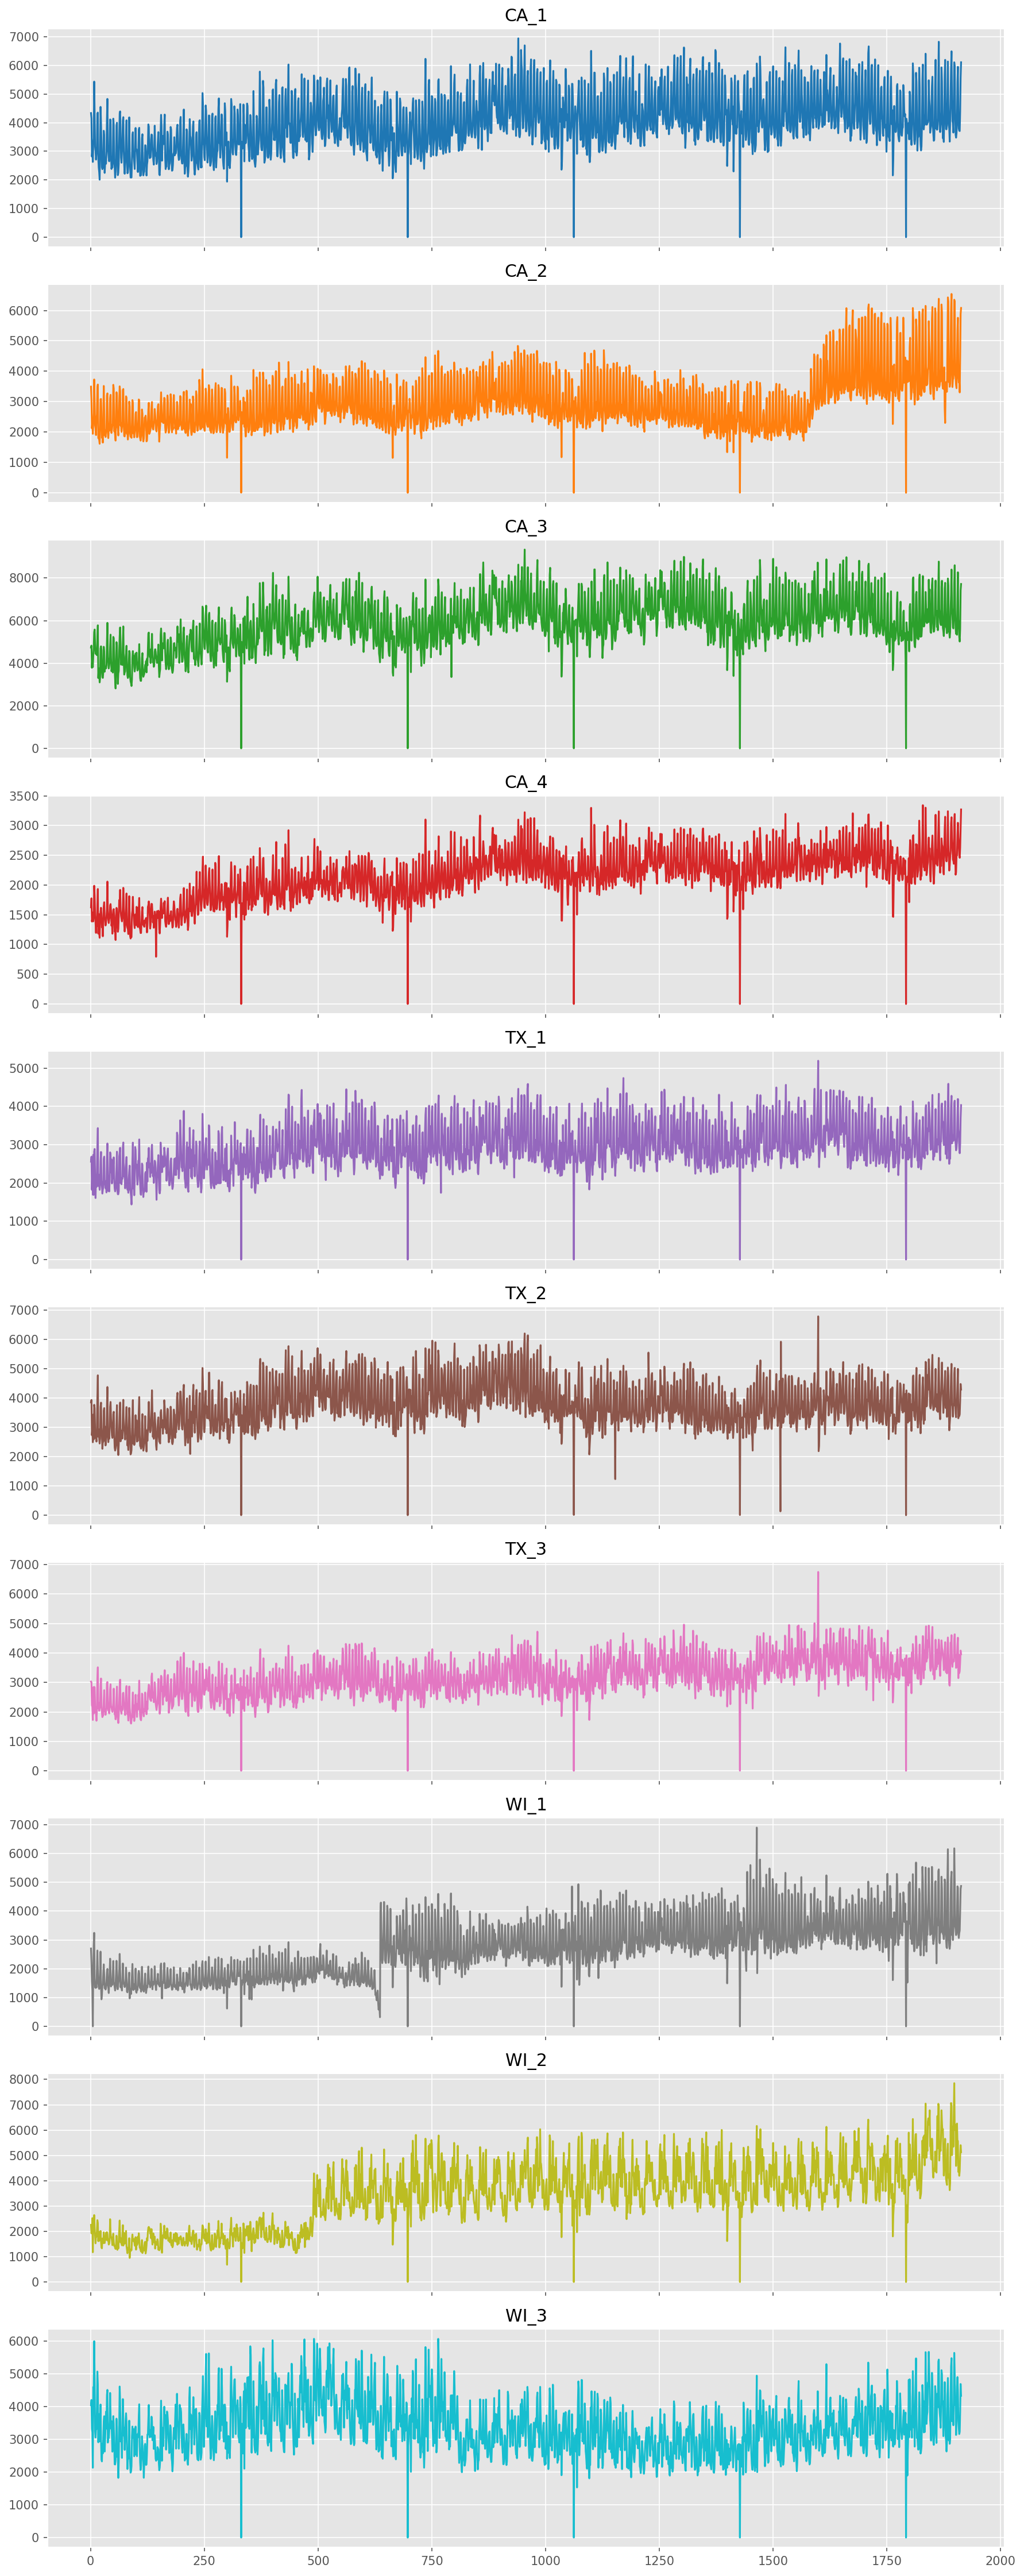

In [ ]:
import matplotlib.cm as cm 
import numpy as np 

stores = df['store_id'].unique()
fig, axes = plt.subplots(len(stores), 1, figsize=(12, 3*len(stores)), sharex=True)
colors = cm.tab10(np.linspace(0, 1, len(stores))) # 10 predefined colors 

for i, store in enumerate(stores):
    tmp = df[df['store_id'] == store].groupby('d')['sales'].sum()
    axes[i].plot(tmp.index, tmp.values,color=colors[i])
    axes[i].set_title(le['store_id'].classes_[store])

plt.tight_layout()
plt.show()


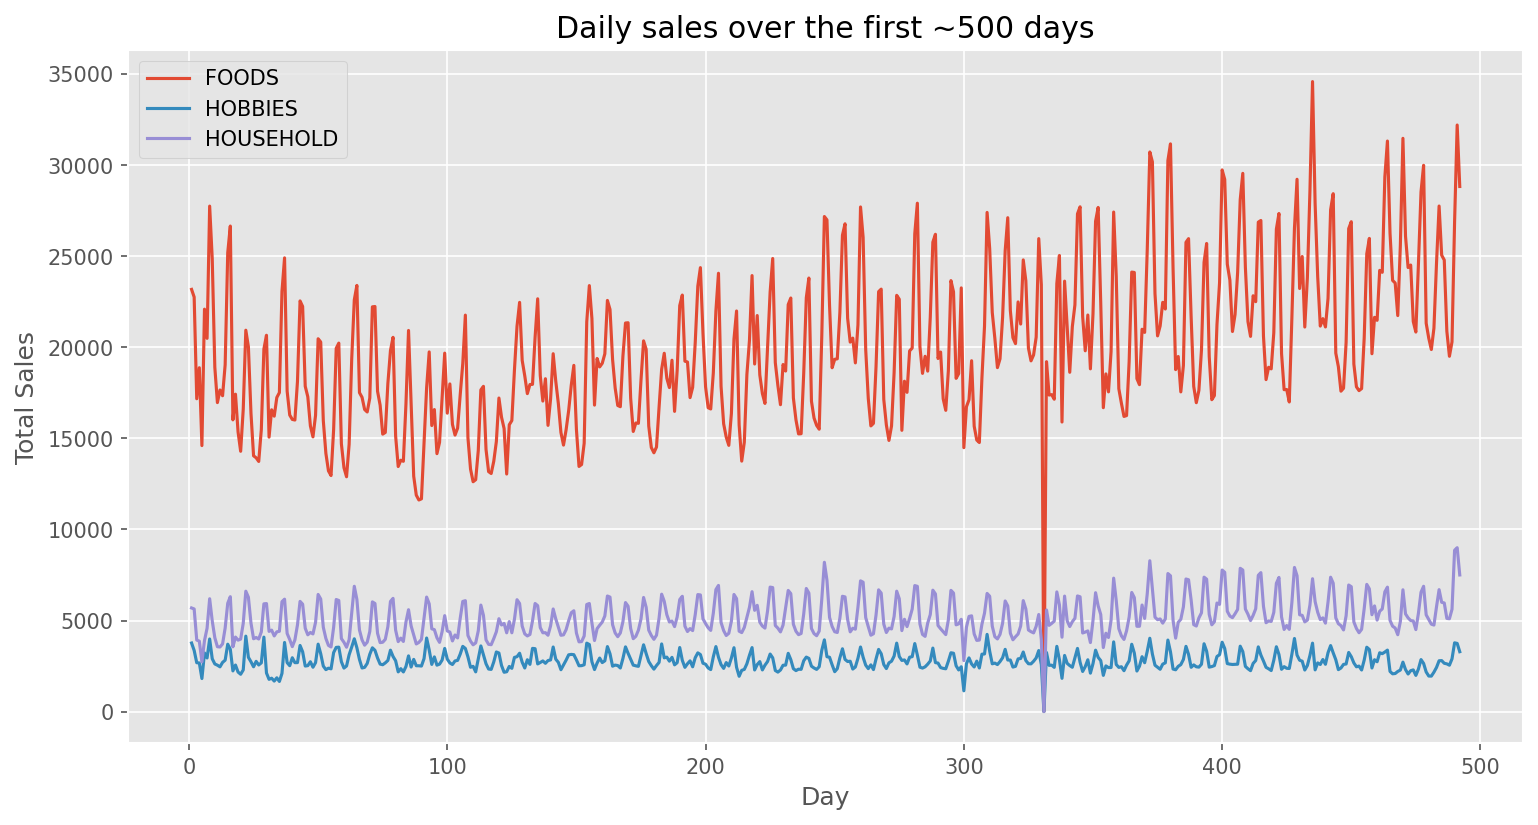

3909

In [8]:
df2=df[:15_000_000]
daily_sales_1 = df2[df2['cat_id']==0].groupby('d')['sales'].sum()
daily_sales_2 = df2[df2['cat_id']==1].groupby('d')['sales'].sum()
daily_sales_3 = df2[df2['cat_id']==2].groupby('d')['sales'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales_1.index, daily_sales_1.values,label=le['cat_id'].classes_[0])
plt.plot(daily_sales_2.index, daily_sales_2.values,label=le['cat_id'].classes_[1])
plt.plot(daily_sales_3.index, daily_sales_3.values,label=le['cat_id'].classes_[2])
plt.legend()
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.title('Daily sales over the first ~500 days')
plt.show()

del daily_sales_1,daily_sales_2,daily_sales_3,df2
gc.collect()

#### Sales per store 

In [8]:
import pickle as pkl 

with open('validation_le_encoders.pkl','rb') as f : 
    le=pkl.load(f)

In [7]:
print(le)

{'event_name_1': LabelEncoder(), 'event_type_1': LabelEncoder(), 'event_name_2': LabelEncoder(), 'event_type_2': LabelEncoder()}


<BarContainer object of 10 artists>

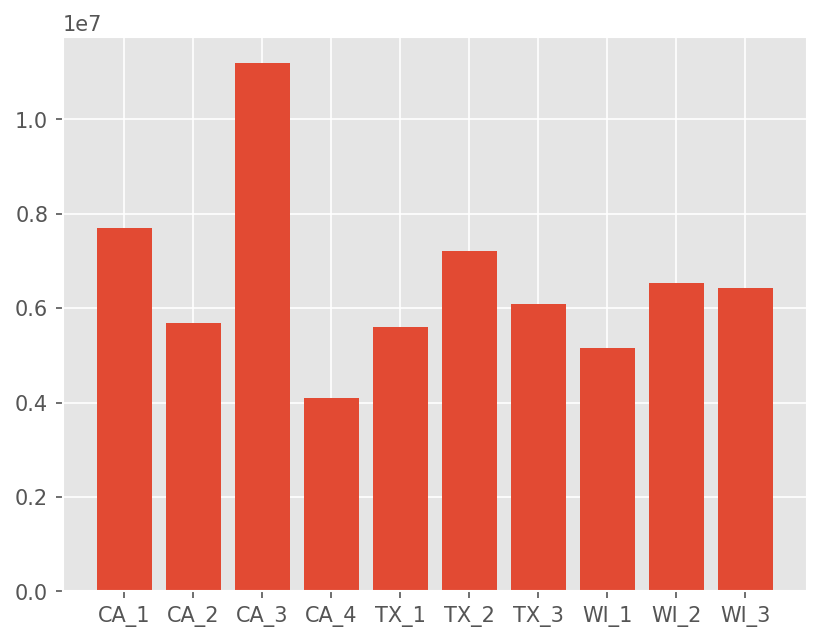

In [9]:
tmp=df.groupby('store_id')['sales'].sum()

plt.bar(le['store_id'].classes_,tmp.values)

In [10]:
gc.collect()

0

#### The impact of events on sales 

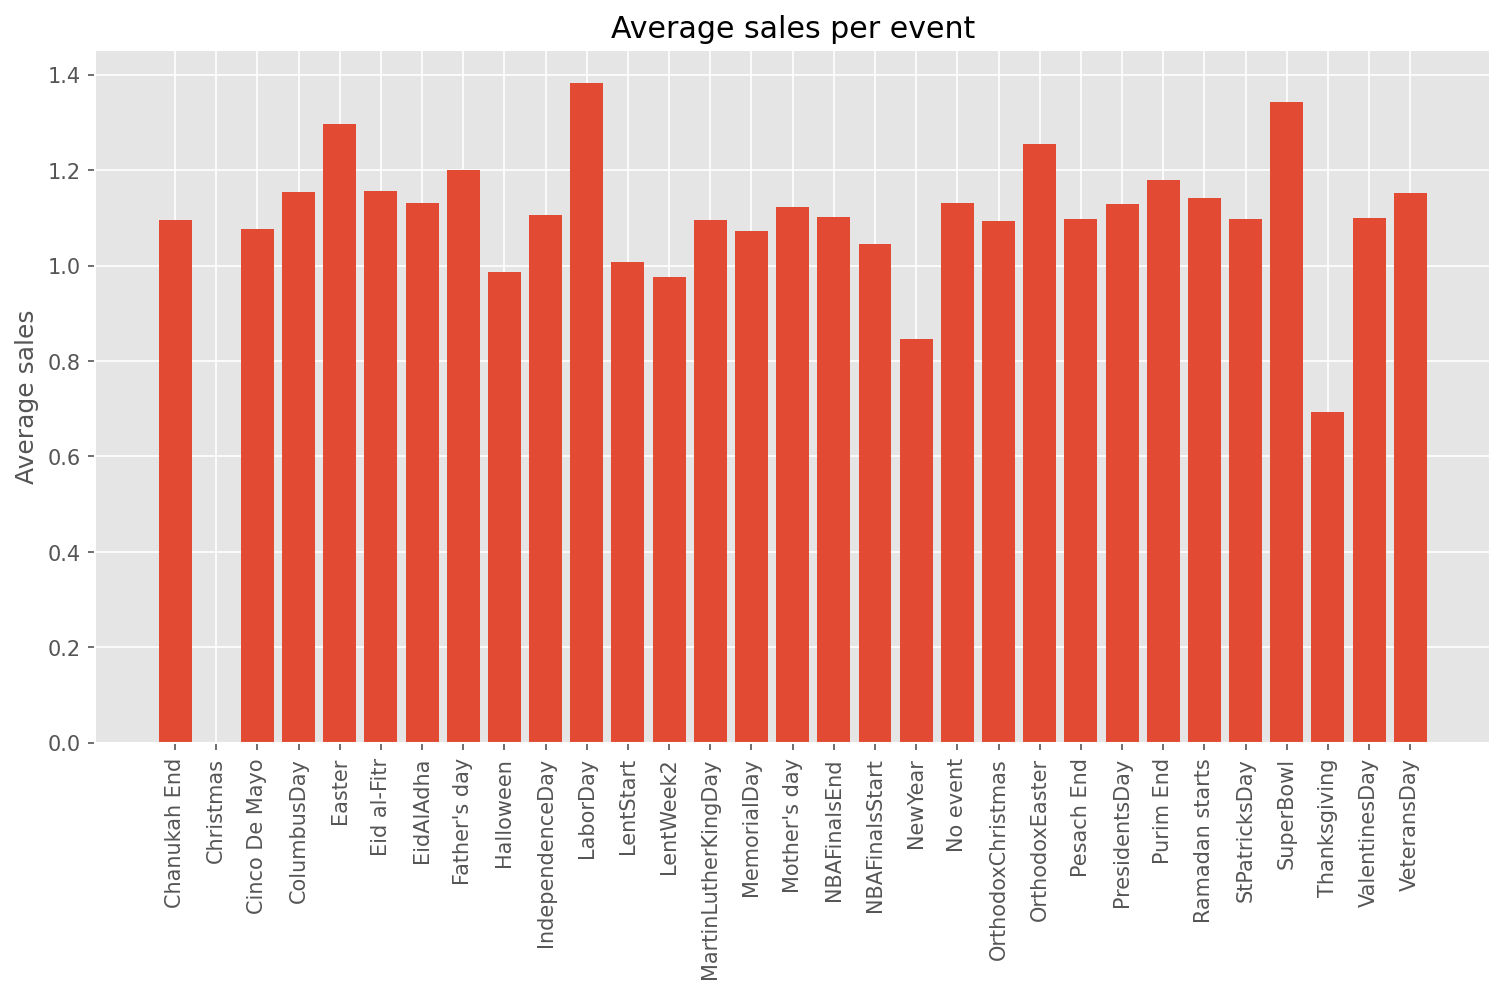

44302

In [27]:
tmp=df.groupby('event_name_1')['sales'].mean()
plt.figure(figsize=(12,6))
plt.bar(le['event_name_1'].classes_,tmp.values)
plt.title('Average sales per event')
plt.ylabel('Average sales')
plt.xticks(rotation=90)
plt.show()

del tmp 
gc.collect()

it makes sense to have no sales in christmas since shops are usually closed that day 